In [27]:
import numpy as np
import csv
import math
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from numpy.typing import NDArray
from physics.models.aeroshell import Aeroshell

drag_csv = pd.read_csv("drag_csv.csv")
data = pd.DataFrame(drag_csv)

C:\Users\sanar\PyCharmMiscProject\.venv\Lib\site-packages\filterpy\common\helpers.py:364: SyntaxWarning: invalid escape sequence '\S'
  """


In [28]:
data.head()

,Angle of Attack,0,18,36,54,72,90,108,126,144,162,180
0,Projected Area [m^2],1.1853,1.695979,2.458166,3.047409,3.490568,3.567229,3.491993,3.057534,2.455826,1.691499,1.187159
1,CdA,0.11609,0.1377,0.242700,0.401800,0.533400,0.667600,0.593700,0.519200,0.226600,0.126600,0.116800
2,Drag [N],23.41,39.73,101.510000,208.350000,316.840000,411.290000,352.760000,270.130000,94.670000,36.430000,23.580000
3,ClA,-0.3166,-0.1992,-0.234500,-0.284700,-0.342500,-0.752200,-0.636600,-0.517300,-0.070000,-0.111300,-0.181400
4,Lift [N],-63.84,-57.48,-98.060000,-147.610000,-203.430000,-457.570000,-378.230000,-269.120000,-29.260000,-32.030000,-36.640000


In [30]:
angles = data.loc[1].astype(str)
coeff = data.loc[2].astype(str)

print(angles)


#down/drag = tan theta

Angle of Attack        CdA
0                  0.11609
18                  0.1377
36                  0.2427
54                  0.4018
72                  0.5334
90                  0.6676
108                 0.5937
126                 0.5192
144                 0.2266
162                 0.1266
180                 0.1168
Name: 1, dtype: object


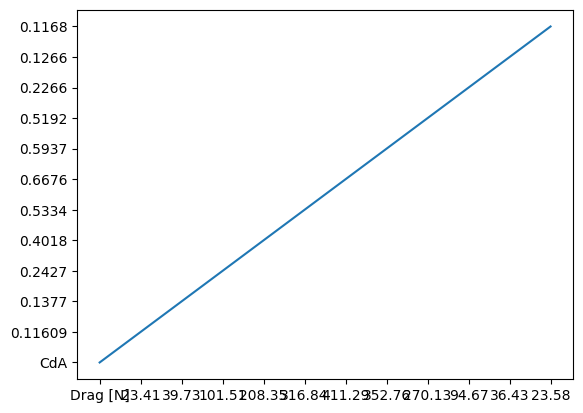

In [31]:
plt.plot(coeff, angles)

In [32]:
aeroshell_motor = Aeroshell(drag_lookup={



    0:
    0.11609,
    18:
    0.1377,
    36:
    0.2427,
    54:
    0.4018,
    72:
    0.5334,
    90:
    0.6676,
    108:
    0.5937,
    126:
    0.5192,
    144:
    0.2266,
    162:
    0.1266
        # 0: 23.41,
        #                           18: 39.73,
        #                           36: 101.51,
        #                           54: 208.35,
        #                           72: 316.84,
        #                           90: 411.29,
        #                           108: 352.76,
        #                           126: 270.13,
        #                           144: 94.67,
        #                           162: 36.43,
        #                           180: 23.58
                                  }, down_lookup={
        0: 63.84,
        18: 57.48,
        36: 98.06,
        54: 147.61,
        72: 203.43,
        90: 457.57,
        108: 378.23,
        126: 269.12,
        144: 29.26,
        162: 32.03,
        180: 36.64
    }, wind_reference_speed=16.667, density = 1.225)




In [35]:

    # Define deterministic inputs for the calculate drag_force method

    wind_attack_angles = np.array([0.0, 18.0, 36.0])
    wind_speeds = np.zeros_like(wind_attack_angles)
    required_speed_ms = np.full_like(wind_attack_angles, 16.67)
    drag_force = aeroshell_motor.calculate_drag(wind_speeds, wind_attack_angles, required_speed_ms)
    expected = np.array([23.41842819, 39.7443038, 101.54654616])
    print(drag_force)
    #assert np.allclose(drag_force, expected, atol=1e-3)



#

[19.75932497 22.29038443 33.41986672]


ValueError: could not convert string to float: 'CdA'

In [ ]:

 interp_func = make_interp_spline(wind_attack_angles, angles)


In [37]:
angles.astype(float)

ValueError: could not convert string to float: 'CdA'

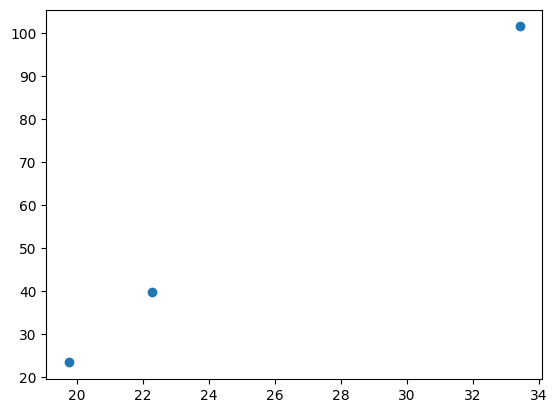

In [34]:
plt.scatter(wind_attack_angles, expected)